# Generate synthetic data with implanted motifs (Figure 1C, S1)

In [1]:
import numpy as np
import os
import pandas as pd
from Bio import SeqIO
import random
import itertools

## set BMF distance parameters

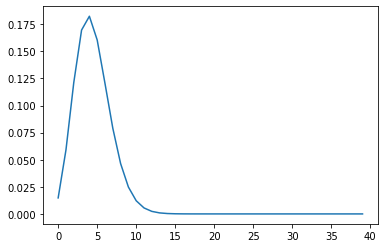

In [2]:
from matplotlib import pyplot as plt
from scipy.stats import nbinom
xx = np.arange(0, 40, 1)
r = 40
p = 0.9
plt.plot(xx, nbinom.pmf(xx, r, p))

In [3]:
append = False #append to file to generate motif mixture models if needed

alphabet = ['A','C','G','T']

#kmers in the list will get equal probabilities
core1 = ['AAA','AAT'] # BMF core I
core2 = ['CCC','CCG'] # BMF core II
l = 3

seq_length = 40
no_sequences = 2000  #number of positive and negative sequences generated
ratio_with_motif = 1 #raito of sequences in the positive set to have the implanted motif

## generate sequences

In [4]:
def generate_sequences(no_sequences):
    no_motifs = int(no_sequences*ratio_with_motif)
    #generate random sequences 
    positive_sequences = [''.join([random.choice(alphabet) for i in range(seq_length)]) for j in range(no_sequences)]
    negative_sequences = [''.join([random.choice(alphabet) for i in range(seq_length)]) for j in range(no_sequences)]

    #assume one motif per sequence
    seqs_to_insert = random.sample(range(no_sequences),no_motifs) #select sequences for motif insertion

    for i in seqs_to_insert:
        seq = positive_sequences[i]

        dist = np.random.negative_binomial(r, p, 1)[0]  #motif distances
        ins = random.choice(range(0, max(1,seq_length-l*2-dist)))  #insertion position
        c1 = random.choice(core1)    #select core 1 
        c2 = random.choice(core2)    #select core 2

        seq = list(seq)   #convert to list for indexing
        for pos in range(len(c1)):  #insert core 1
            if pos + ins < len(seq):
                seq[pos+ins] = c1[pos]

        for pos in range(len(c2)):   #insert core 2
            if pos + ins + dist + len(c1) < len(seq):
                seq[pos+ins+dist+len(c1)] = c2[pos]

        seq = ''.join(seq)

        positive_sequences[i] = seq
    
    return positive_sequences, negative_sequences

## save sequences as fasta/fastq/seq files

In [5]:
def write_seqs(positive_sequences, negative_sequences, file_pos, file_neg):
    #write positives to file
    with open(file_pos, 'a' if append else 'w') as f:
        for i, seq in enumerate(positive_sequences):
            print('> header', i+1, file=f)
            print(seq, file=f)

    #write negatives to file
    with open(file_neg, 'w') as f:
        for i, seq in enumerate(negative_sequences):
            print('> header', i+1, file=f)
            print(seq, file=f)

In [6]:
def write_seqs_fastq(positive_sequences, negative_sequences, file_pos, file_neg):
    #write positives to file
    with open(file_pos + '.fastq', 'a' if append else 'w') as f:
        for i, seq in enumerate(positive_sequences):
            print('@header', i+1, file=f)
            print(seq, file=f)
            print('+', file=f)
            print(''.join(['~']*len(seq)), file=f)

    #write negatives to file
    with open(file_neg + '.fastq', 'w') as f:
        for i, seq in enumerate(negative_sequences):
            print('@header', i+1, file=f)
            print(seq, file=f)
            print('+', file=f)
            print(''.join(['~']*len(seq)), file=f)
            
def write_seqs_fasta(positive_sequences, negative_sequences, file_pos, file_neg):
    #write positives to file
    with open(file_pos + '.fasta', 'a' if append else 'w') as f:
        for i, seq in enumerate(positive_sequences):
            print('>header', i+1, file=f)
            print(seq, file=f)

    #write negatives to file
    with open(file_neg + '.fasta', 'w') as f:
        for i, seq in enumerate(negative_sequences):
            print('>header', i+1, file=f)
            print(seq, file=f)

## generate dataset

In [7]:
write_seqs_fasta(*generate_sequences(no_sequences), 'data/positives_AAat_CCcg', 'data/negatives_AAat_CCcg')